In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import nlopt
import seaborn as sns
from statsrat import perform_oat, oat_grid, make_sim_data, learn_plot
from statsrat.expr.predef.cat import ibre, lrn_pred
from statsrat.rw.predef import smpr
import statsrat.bayes_regr as br
from statsrat.rw.fbase import elem, elem_intercept
from scipy import stats
from plotnine import ggplot, geom_point, geom_line, aes, stat_smooth, facet_wrap

In [11]:
#m = br.model(name = 'linear', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.constant)
#m = br.model(name = 'linear ARD', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.ard)
#m = br.model(name = 'linear derived attention ARD', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)

#m = br.model(name = 'probit', fbase = elem, link = br.link.probit, tausq_inv_dist = br.tausq_inv_dist.constant)
#m = br.model(name = 'probit ARD', fbase = elem, link = br.link.probit, tausq_inv_dist = br.tausq_inv_dist.ard)
m = br.model(name = 'probit derived attention ARD', fbase = elem, link = br.link.probit, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)
print(m.pars)
trials = ibre.make_trials()
ds = m.simulate(trials)

                        min   max  default
prior_tausq_inv_hpar0 -20.0   0.0     -2.0
prior_tausq_inv_hpar1  -1.0  19.0      3.0
resp_scale              0.0  10.0      1.0


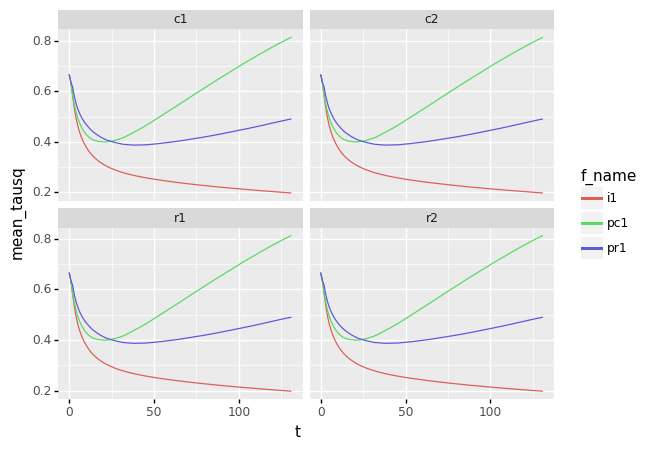

<ggplot: (304744786)>

In [12]:
var = 'mean_tausq'
learn_plot(ds, var, sel = {'f_name': ['pc1', 'pr1', 'i1']})

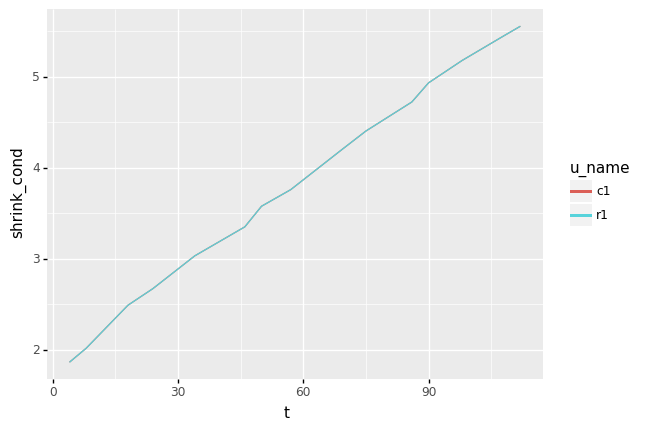

<ggplot: (303379616)>

In [9]:
#var = 'mean_z'
var = 'shrink_cond'
index = ds.trial_name == 'i1.pr1 -> r1'
#index = ds.trial_name == 'i1.pc1 -> c1'
learn_plot(ds, var, sel = {'u_name': ['c1', 'r1'], 't': index})

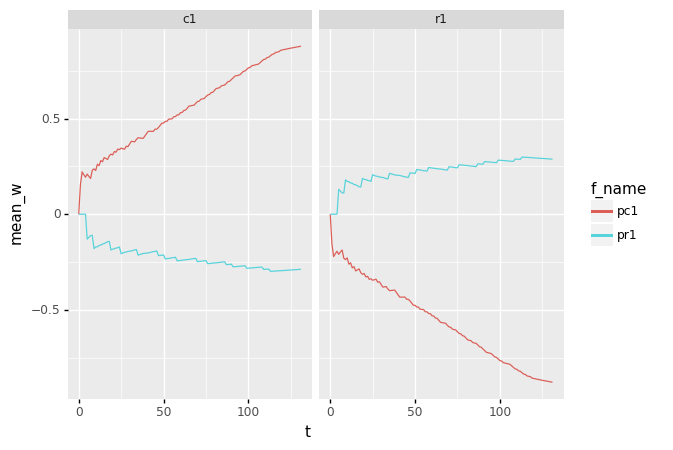

<ggplot: (304676952)>

In [10]:
var = 'mean_w'
#var = 'mean_wsq'
learn_plot(ds, var, sel = {'f_name': ['pc1', 'pr1'], 'u_name': ['c1', 'r1']})

In [6]:
# ordinal adequacy test (OAT) for the IBRE

n = 20
max_time = 120
#algorithm = nlopt.GN_DIRECT_L
algorithm = nlopt.GN_AGS
#algorithm = nlopt.GN_ORIG_DIRECT
#algorithm = nlopt.GD_STOGO

m = br.model(name = 'elemental', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.constant)
#m = br.model(name = 'elemental ARD', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.ard)
#m = br.model(name = 'elemental derived attention ARD', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)
#m = ard_linear.model(name = 'elemental ARD', fbase = elem)

oat_result = perform_oat(m, ibre, minimize = False, n = n, max_time = max_time, algorithm = algorithm)
print(oat_result.round(5))

UnboundLocalError: local variable 'ds_s' referenced before assignment

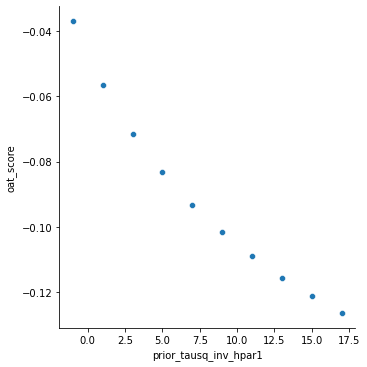

In [7]:
m = ard_linear.model(name = 'elemental ARD', fbase = elem)
free_par = 'u_var'
fixed_values = {'prior_tausq_inv_hpar0': -3, 'prior_tausq_inv_hpar1': 0, 'resp_scale': 5}

df = oat_grid(m,
              ibre,
              free_par = free_par,
              fixed_values = fixed_values,
              n_points = 5)
sns.relplot(x = free_par, y = 'oat_score', data = df)

In [2]:
# ordinal adequacy test (OAT) for learned predictiveness
n = 20
max_time = 5
algorithm = nlopt.GN_AGS
m = ard_linear.model(name = 'elemental ARD', fbase = elem)
oat_result = perform_oat(m, lrn_pred, n = n, max_time = max_time, algorithm = algorithm)
print(oat_result.round(5))

<xarray.DataArray 'trial_name' (ident: 20, t: 8)>
array([[ True, False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False],
       [False, False, False,  True, False, False, False, False],
       [False, False, False, False, False,  True, False, False],
       [False, False, False, False,  True, False, False, False],
       [ True, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False,  True],
       [ True, False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True, False],
       [False, False, False,  True, False, False, False, False],
       [ True, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False,  True, False, False],
       [False,  True, False, False, False, False, False, False],
       [False, False, False,  True, Fals

IndexError: Boolean array size 20 is used to index array with shape (8,).